In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score,GridSearchCV
from xgboost import XGBClassifier

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path="/content/drive/My Drive/Colab Notebooks/EasyVisa.csv"
df=pd.read_csv(path)


In [5]:
data=df.copy()

In [6]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


<Axes: xlabel='education_of_employee', ylabel='has_job_experience'>

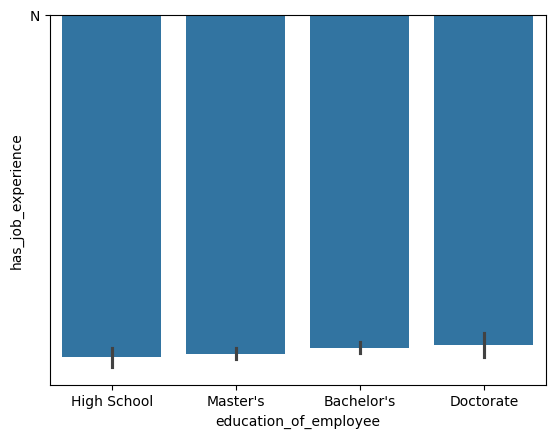

In [7]:
sns.barplot(data=df,x='education_of_employee',y='has_job_experience')

In [8]:

data.shape

(25480, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.000,NaN,NaN,NaN,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,NaN,NaN,NaN,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.000,NaN,NaN,NaN,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


In [12]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [13]:
data.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
zero_wage_count = data[data['prevailing_wage'] == 0].shape[0]
print("Number of observations with prevailing_wage = 0:", zero_wage_count)

Number of observations with prevailing_wage = 0: 0


In [16]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

case_id
EZYV25480   0.000
EZYV01      0.000
EZYV02      0.000
EZYV03      0.000
EZYV04      0.000
             ... 
EZYV13      0.000
EZYV12      0.000
EZYV11      0.000
EZYV10      0.000
EZYV09      0.000
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia            0.662
Europe          0.146
North America   0.129
South America   0.033
Africa          0.022
Oceania         0.008
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's    0.402
Master's      0.378
High School   0.134
Doctorate     0.086
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y   0.581
N   0.419
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N   0.884
Y   0.116
Name: proportion, dtype: float64
--------------------------------------------------
region_of_employment
Northeast   0

In [17]:
# case_id is unique for each candidate and might not add value to modeling
data.drop(["case_id"], axis=1, inplace=True)

In [18]:
data["case_status"].replace(1, "Certified", inplace=True)
data["case_status"].replace(0, "Denied", inplace=True)

In [19]:
data["no_of_employees"].describe()

,no_of_employees
count,25480.000
mean,5667.043
std,22877.929
min,-26.000
25%,1022.000
50%,2109.000
75%,3504.000
max,602069.000


##EDA

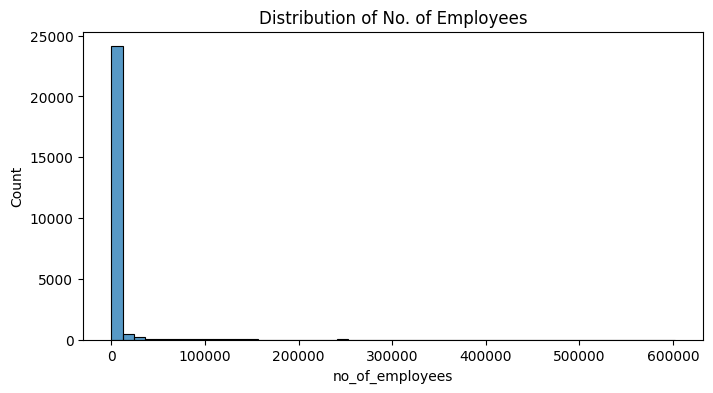

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(data['no_of_employees'], bins=50)
plt.title("Distribution of No. of Employees")
plt.show()

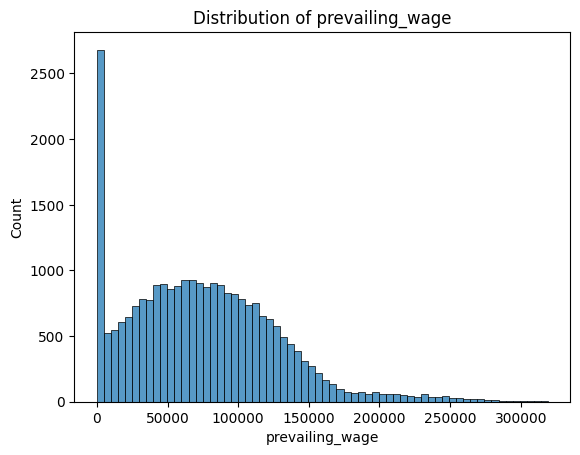

In [21]:

sns.histplot(data['prevailing_wage'])
plt.title("Distribution of prevailing_wage")
plt.show()

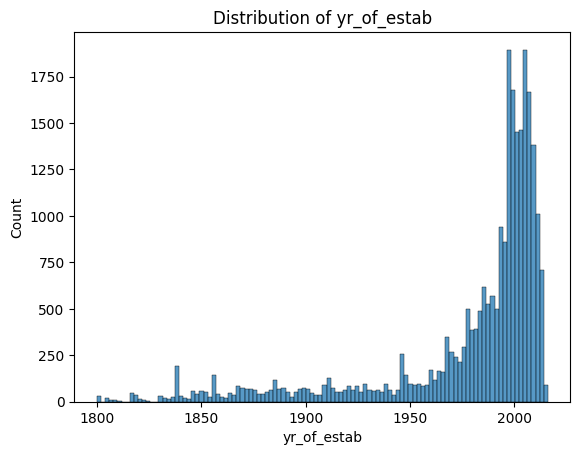

In [22]:
sns.histplot(data['yr_of_estab'])
plt.title("Distribution of yr_of_estab")
plt.show()


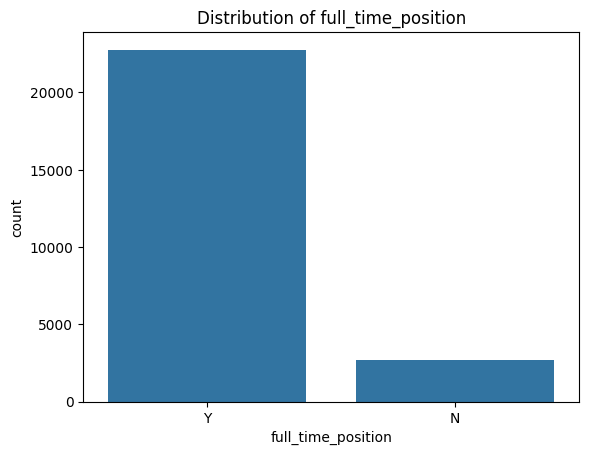

In [23]:
sns.countplot(data=data,x='full_time_position')
plt.title("Distribution of full_time_position")
plt.show()

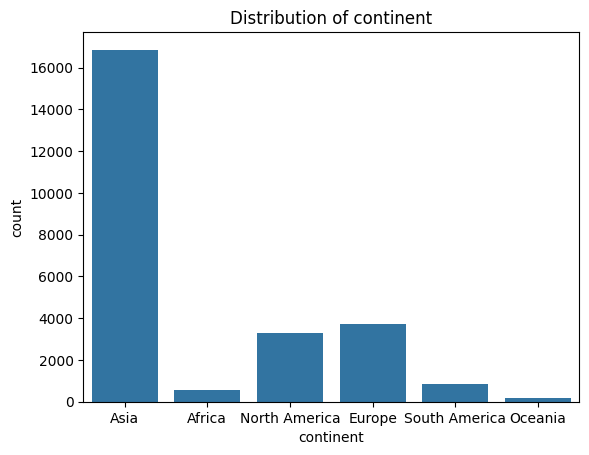

In [24]:
sns.countplot(data=data,x='continent')
plt.title("Distribution of continent")
plt.show()

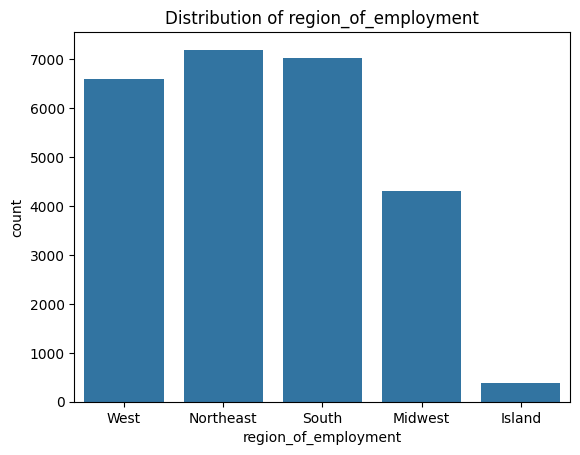

In [25]:
sns.countplot(data=data,x='region_of_employment')
plt.title("Distribution of region_of_employment")
plt.show()

[Text(0, 0, '4100'),
 Text(0, 0, '4526'),
 Text(0, 0, '4913'),
 Text(0, 0, '3253'),
 Text(0, 0, '226')]

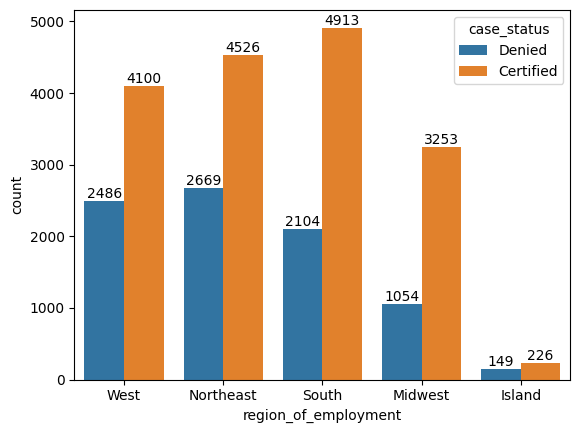

In [26]:
bplot=sns.countplot(data=data,hue='case_status',x='region_of_employment');
plt.bar_label(bplot.containers[0])
plt.bar_label(bplot.containers[1])
# plt.show()

# The South region has the highest number of certified cases (4,913), while the Island region has the least (226).

# The Midwest region shows a significant gap, with fewer denied cases (1,054) compared to certified ones (3,253).

# Overall, certified cases consistently outnumber denied ones across all regions, indicating positive outcomes for most applicants.

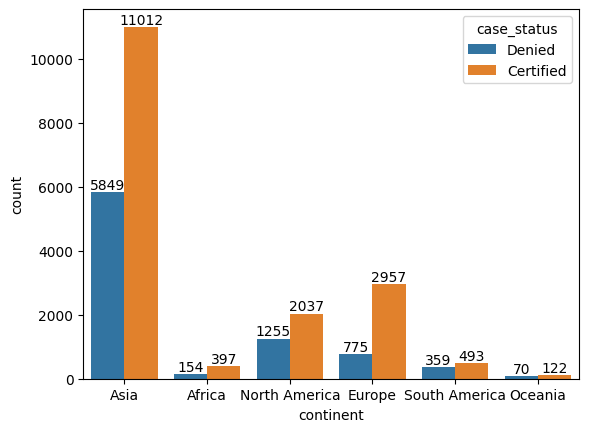

In [27]:
bplot=sns.countplot(data=data,hue='case_status',x='continent');
plt.bar_label(bplot.containers[0])
plt.bar_label(bplot.containers[1])
plt.show()

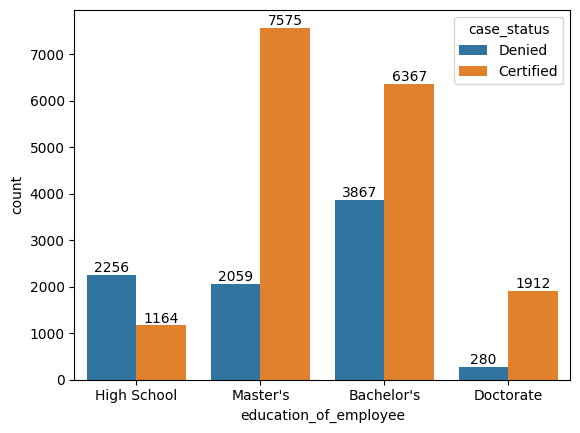

In [28]:


bplot=sns.countplot(data=data,hue='case_status',x='education_of_employee');
plt.bar_label(bplot.containers[0])
plt.bar_label(bplot.containers[1])
plt.show()

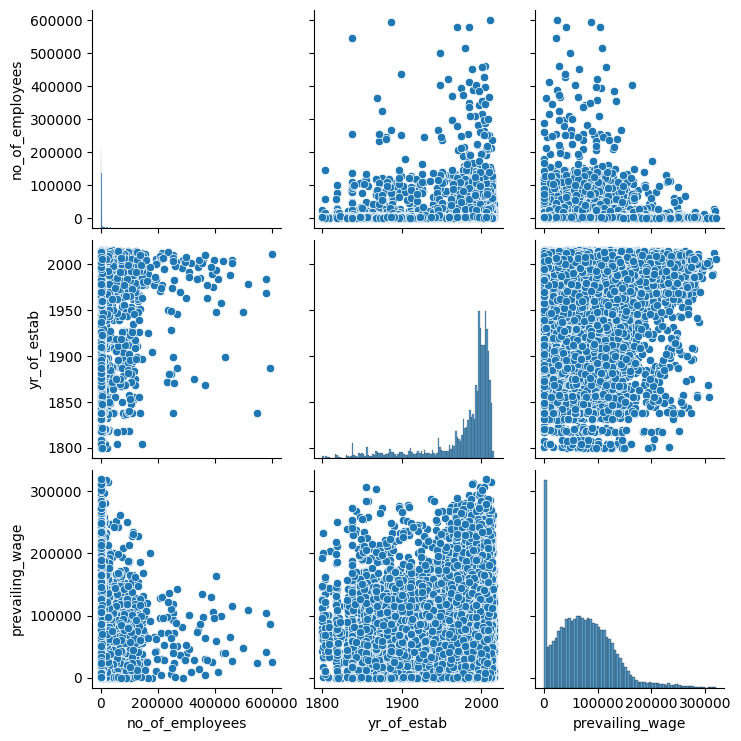

In [29]:
sns.pairplot(data)

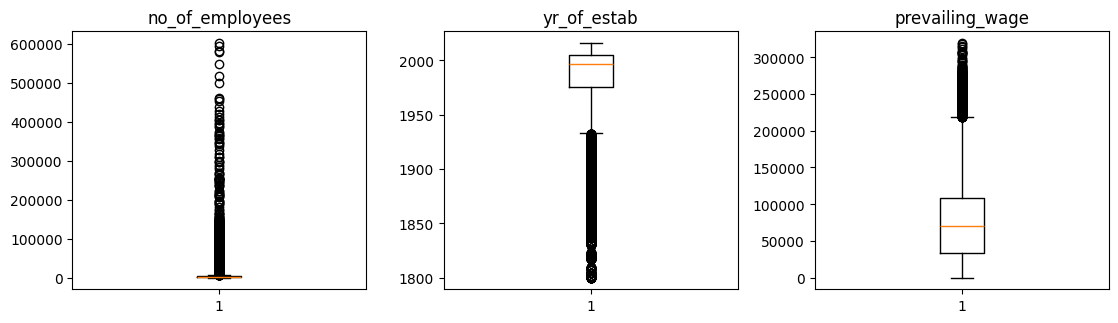

In [30]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
#numeric_columns.remove("target")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [31]:
data=data[data['no_of_employees']>=0]
"Keep only the rows where the number of employees is 0 or more."
# # Before filtering
# print(data)
# #    no_of_employees
# # 0              100
# # 1              500
# # 2              -20  ❌ Invalid
# # 3             2000

# data = data[data['no_of_employees'] >= 0]

# # After filtering
# print(data)
# #    no_of_employees
# # 0              100
# # 1              500
# # 3             2000

'Keep only the rows where the number of employees is 0 or more.'

In [32]:
data["no_of_employees"].describe()


,no_of_employees
count,25447.000
mean,5674.415
std,22891.842
min,12.000
25%,1025.000
50%,2112.000
75%,3506.500
max,602069.000


In [33]:
data['case_status'].value_counts(1)

,proportion
case_status,
Certified,0.668
Denied,0.332


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25447 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25447 non-null  object 
 1   education_of_employee  25447 non-null  object 
 2   has_job_experience     25447 non-null  object 
 3   requires_job_training  25447 non-null  object 
 4   no_of_employees        25447 non-null  int64  
 5   yr_of_estab            25447 non-null  int64  
 6   region_of_employment   25447 non-null  object 
 7   prevailing_wage        25447 non-null  float64
 8   unit_of_wage           25447 non-null  object 
 9   full_time_position     25447 non-null  object 
 10  case_status            25447 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ MB


In [35]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them
education_of_employee = {
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "Doctorate": 4}
data["education_of_employee"] = data["education_of_employee"].map(education_of_employee)

has_job_experience = {
    "Y": 0,
    "N": 1}
data["has_job_experience"] = data["has_job_experience"].map(has_job_experience)

requires_job_training= {
    "Y": 0,
    "N": 1}
data["requires_job_training"] = data["requires_job_training"].map(requires_job_training)

full_time_position= {
    "Y": 0,
    "N": 1}
data["full_time_position"] = data["full_time_position"].map(full_time_position)




In [36]:
unit_multipliers = {
    'Hourly': 40 * 52,  # 2080
    'Weekly': 52,
    'Monthly': 12,
    'Yearly': 1
}

# Calculate standardized yearly wage
data['yearly_wage'] = data.apply(
    lambda row: row['prevailing_wage'] * unit_multipliers.get(row['unit_of_wage'], 1),
    axis=1
)

# Drop unit_of_wage
data.drop(['unit_of_wage'], axis=1, inplace=True)

# (Optional) Drop prevailing_wage if only using yearly_wage
data.drop(['prevailing_wage'], axis=1, inplace=True)
data.drop(['yr_of_estab'],axis=1,inplace=True)


In [37]:
data = pd.get_dummies(
    data,
    columns=data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

data = data.astype(int)

In [38]:
data.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,full_time_position,yearly_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,case_status_Denied
0,1,1,1,14513,0,592,1,0,0,0,0,0,0,0,1,1
1,3,0,1,2412,0,83425,1,0,0,0,0,0,1,0,0,0
2,2,1,0,44444,0,122996,1,0,0,0,0,0,0,0,1,1
3,2,1,1,98,0,83434,1,0,0,0,0,0,0,0,1,1
4,3,0,1,1082,0,149907,0,0,0,0,0,0,0,1,0,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25447 entries, 0 to 25479
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   education_of_employee           25447 non-null  int64
 1   has_job_experience              25447 non-null  int64
 2   requires_job_training           25447 non-null  int64
 3   no_of_employees                 25447 non-null  int64
 4   full_time_position              25447 non-null  int64
 5   yearly_wage                     25447 non-null  int64
 6   continent_Asia                  25447 non-null  int64
 7   continent_Europe                25447 non-null  int64
 8   continent_North America         25447 non-null  int64
 9   continent_Oceania               25447 non-null  int64
 10  continent_South America         25447 non-null  int64
 11  region_of_employment_Midwest    25447 non-null  int64
 12  region_of_employment_Northeast  25447 non-null  int64
 13  region

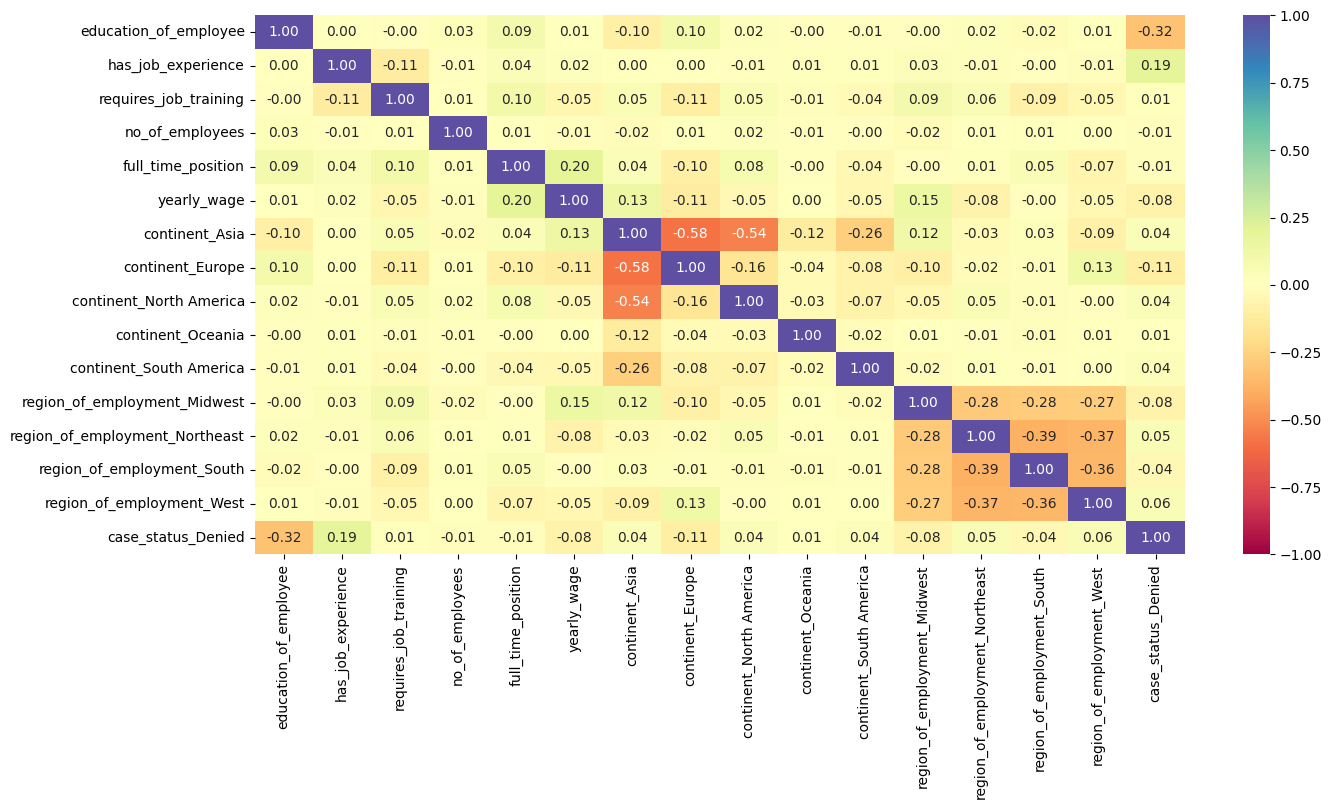

In [40]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [41]:
X=data.drop(['case_status_Denied'],axis=1)
y=data['case_status_Denied']

X = pd.get_dummies(X, drop_first=True)

In [42]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15267, 15) (5090, 15) (5090, 15)


In [43]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15267, 15) (5090, 15) (5090, 15)


In [44]:

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts())
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
case_status_Denied
0   0.668
1   0.332
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
case_status_Denied
0    10199
1     5068
Name: count, dtype: int64
********************************************************************************
Target value ratio in y_val
case_status_Denied
0   0.668
1   0.332
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
case_status_Denied
0   0.668
1   0.332
Name: proportion, dtype: float64
********************************************************************************


In [45]:
 #defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    data_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return data_perf

In [46]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#performace on training data




In [47]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    #print("{}: {}".format(name, cv_result.mean() * 100))

print("\nTraining Performance on original data:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance on original data:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Cross-Validation Performance:


Training Performance on original data:

Bagging: 0.9378453038674033
Random forest: 1.0
GBM: 0.499802683504341
Adaboost: 0.4228492501973165
dtree: 1.0

Validation Performance on original data:

Bagging: 0.43280047365304913
Random forest: 0.46536412078152756
GBM: 0.49141503848431023
Adaboost: 0.4073416222616933
dtree: 0.5020722320899941


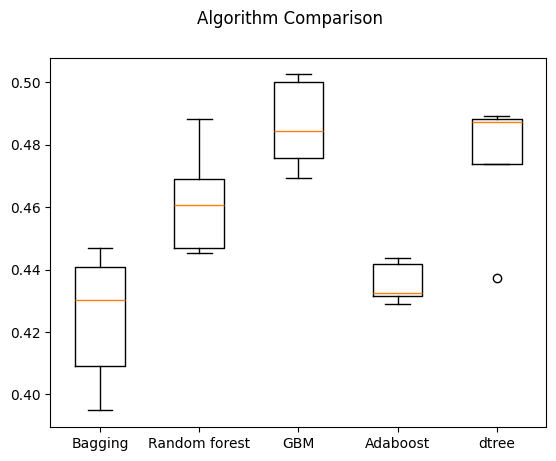

In [48]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#Tunning GradientBoosting with gridsearchCV and randomizecv

In [49]:
#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators':np.arange(50,150,50),
    'learning_rate':[0.01,0.1,0.2,0.05],
    'subsample':[0.8,0.9,1],
    'max_depth':np.arange(1,5,1),
     'loss':['log_loss']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=100, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': np.int64(50), 'max_depth': np.int64(4), 'loss': 'log_loss', 'learning_rate': 0.2} with CV score=0.4978381630519227:


In [76]:
tuned_GBM2 = GradientBoostingClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.2,
    subsample=0.9,
    max_depth=4,
    loss='log_loss'
)
tuned_GBM2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=50,
                           random_state=1, subsample=0.9)

In [77]:
GBM_train2 =model_performance_classification_sklearn(tuned_GBM2, X_train, y_train)
GBM_train2

,Accuracy,Recall,Precision,F1
0,0.767,0.535,0.693,0.604


In [78]:
# Checking model's performance on validation set
GBM_val2 = model_performance_classification_sklearn(tuned_GBM2, X_val, y_val)
GBM_val2


,Accuracy,Recall,Precision,F1
0,0.743,0.509,0.643,0.568


In [79]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_GBM2, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.749,0.496,0.662,0.567


##Smote_oversampling

In [54]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 5068
Before Oversampling, counts of label 'No': 10199 

After Oversampling, counts of label 'Yes': 10199
After Oversampling, counts of label 'No': 10199 

After Oversampling, the shape of train_X: (20398, 15)
After Oversampling, the shape of train_y: (20398,) 



In [55]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance on oversampled data :" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance on oversampled data:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance on oversampled data :

Bagging: 0.9673497401706049
Random forest: 1.0
GBM: 0.7391901166781057
Adaboost: 0.7643886655554466
dtree: 1.0

Validation Performance on oversampled data:

Bagging: 0.44404973357015987
Random forest: 0.4985198342214328
GBM: 0.5257548845470693
Adaboost: 0.5849615156897573
dtree: 0.5103611604499704


##Undersampling

In [56]:

rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [57]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))


print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5068
Before Under Sampling, counts of label 'No': 10199 

After Under Sampling, counts of label 'Yes': 5068
After Under Sampling, counts of label 'No': 5068 

After Under Sampling, the shape of train_X: (10136, 15)
After Under Sampling, the shape of train_y: (10136,) 



In [58]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance on undersampled data:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performanceon undersampled data:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance on undersampled data:

Bagging: 0.9654696132596685
Random forest: 1.0
GBM: 0.7032359905288083
Adaboost: 0.6641673243883188
dtree: 1.0

Validation Performanceon undersampled data:

Bagging: 0.6317347542924807
Random forest: 0.6743635287152161
GBM: 0.6921255180580225
Adaboost: 0.6725873297809355
dtree: 0.6222616933096506


##Hyperparameter Tuning


#Tuning AdaBoostClassifier model with undersampled data

In [59]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(30), 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7969366675039088:
CPU times: user 1.61 s, sys: 214 ms, total: 1.83 s
Wall time: 46.8 s


In [91]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=0.01,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=30, random_state=1)

In [92]:
# Checking model's performance on training set
adb_train1 = model_performance_classification_sklearn(tuned_adb, X_train_over, y_train_over)
adb_train1

,Accuracy,Recall,Precision,F1
0,0.685,0.812,0.648,0.720


In [93]:
# Checking model's performance on validation set
adb_val1 = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val1

,Accuracy,Recall,Precision,F1
0,0.606,0.730,0.443,0.551


### Tuning  Gradient Boosting model with Undersampled Data

In [63]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "max_features": ["sqrt", "log2", None],
    'subsample':[0.8,0.9,1],
    'max_depth':np.arange(1,5,1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitt|ing parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': np.int64(150), 'max_features': None, 'max_depth': np.int64(2), 'learning_rate': 0.2} with CV score=0.6994848040561459:
CPU times: user 4.55 s, sys: 440 ms, total: 4.99 s
Wall time: 3min 14s


In [83]:
tuned_gbm_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.8,
    n_estimators=150,
    max_features=None,
    learning_rate=0.2,
    max_depth=2,
)
tuned_gbm_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=150,
                           random_state=1, subsample=0.8)

In [84]:
# Checking model's performance on training set
gbm_train_un = model_performance_classification_sklearn(
    tuned_gbm_un, X_train_un, y_train_un
)
gbm_train_un

,Accuracy,Recall,Precision,F1
0,0.722,0.717,0.724,0.721


In [85]:
# Checking model's performance on validation set
gbm1_val_un = model_performance_classification_sklearn(tuned_gbm_un, X_val, y_val)
gbm1_val_un


,Accuracy,Recall,Precision,F1
0,0.697,0.710,0.532,0.608


### Tuning Gradient Boosting model with Oversampled data

In [67]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [68]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "max_features": ["sqrt", "log2", None],
    'subsample':[0.8,0.9,1],
    'max_depth':np.arange(1,5,1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitt|ing parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'subsample': 0.8, 'n_estimators': np.int64(125), 'max_features': None, 'max_depth': np.int64(1), 'learning_rate': 0.01} with CV score=0.8119508794199387:
CPU times: user 5.32 s, sys: 842 ms, total: 6.16 s
Wall time: 5min 40s


In [86]:
tuned_gbm_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.8,
    n_estimators=125,
    max_depth=1,
    learning_rate=0.01,
    max_features=None
)

tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=125,
                           random_state=1, subsample=0.8)

In [94]:
# Checking model's performance on training set
gbm2_train_over = model_performance_classification_sklearn(tuned_gbm_over, X_train_over, y_train_over)
gbm2_train_over

,Accuracy,Recall,Precision,F1
0,0.685,0.812,0.648,0.720


In [95]:
# Checking model's performance on validation set
gbm2_val_over = model_performance_classification_sklearn(tuned_gbm_over, X_val, y_val)
gbm2_val_over

,Accuracy,Recall,Precision,F1
0,0.606,0.730,0.443,0.551


# **Model Comparison and Final Model Selection**

In [96]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        GBM_train2.T,
        gbm_train_un.T,
        gbm2_train_over.T,
        adb_train1.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with orginal data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with orginal data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.767,0.722,0.685,0.685
Recall,0.535,0.717,0.812,0.812
Precision,0.693,0.724,0.648,0.648
F1,0.604,0.721,0.720,0.720


In [90]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [GBM_val2.T,gbm1_val_un.T, gbm2_val_over.T, adb_val1.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with orginal data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with orginal data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.743,0.697,0.606,0.606
Recall,0.509,0.710,0.730,0.730
Precision,0.643,0.532,0.443,0.443
F1,0.568,0.608,0.551,0.551


In [99]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_gbm_un, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.712,0.702,0.552,0.618


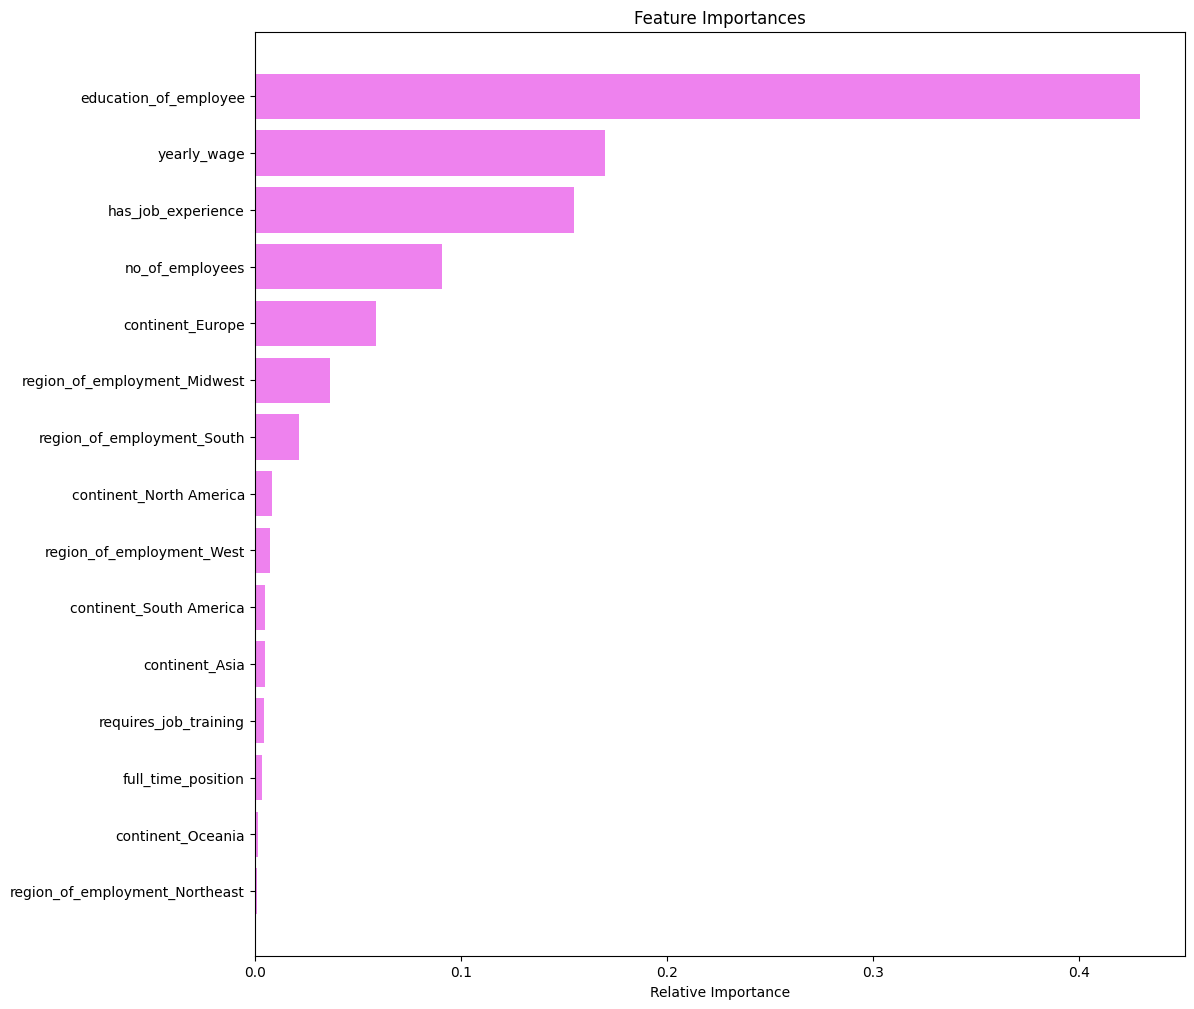

In [100]:
feature_names = X_train.columns
importances = tuned_gbm_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()